___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>

<center><em>Copyright: Pierian Data Inc.</em></center>

_____
# Portfolio Optimization

### Choosing optimal holding ratios based on volatility tolerance

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper [“Portfolio Selection](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf),” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

We already know we can calculate average returns and the volatility of a stock. We can also use the ratio between these two (along with the risk-free rate of return) .

But what if we want a portfolio of multiple stocks, how much of our cash should we put into each holding. Evenly split it between the securities? Is there a way to use historical data to indicate how we should weigh our holdings? If so, is there an optimal weighting based on history?

Here is the general idea Markowitz had:
***We can use historical returns and volatility data to decide on how much we should weigh each holding in our portfolio. We want to choose an optimal weighting that maximizes returns vs. the risk we are willing to take.***

There are different ways of coming up with these optimal weightings. Let's try the simplest method first, equally weighing all the potential holdings.

# Equal Weighted Holdings

### Imports

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [263]:
sp500 = yf.download("WFSPX",start='2018-10-19',end='2022-11-18')['Adj Close']
sp500_it= yf.download("IUIT.L",start='2018-10-19',end='2022-11-18')['Adj Close']
#msci_usa_esg = yf.download("SGAS.DE",start='2018-10-19',end='2022-11-18')['Adj Close']
invesco_eqqq = yf.download("EQQQ.MI",start='2018-10-19',end='2022-11-18')['Adj Close']
vanguard_ftse_dv = yf.download("VEVE.AS",start='2018-10-19',end='2022-11-18')['Adj Close']
ishares_msci_em = yf.download("EMIM.AS",start='2018-10-19',end='2022-11-18')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Basket of Stocks in Retail Stores

If we wanted to invest in a variety of retail based companies, how should we weigh our holdings? Let's first explore equal weighted holdings:

In [264]:
# COSTCO
COST = pd.read_csv("COST.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# WALMART 
WMT = pd.read_csv("WMT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# TARGET
TGT = pd.read_csv("TGT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# DOLLAR GENERAL
DG = pd.read_csv("DG.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

<AxesSubplot:xlabel='Date'>

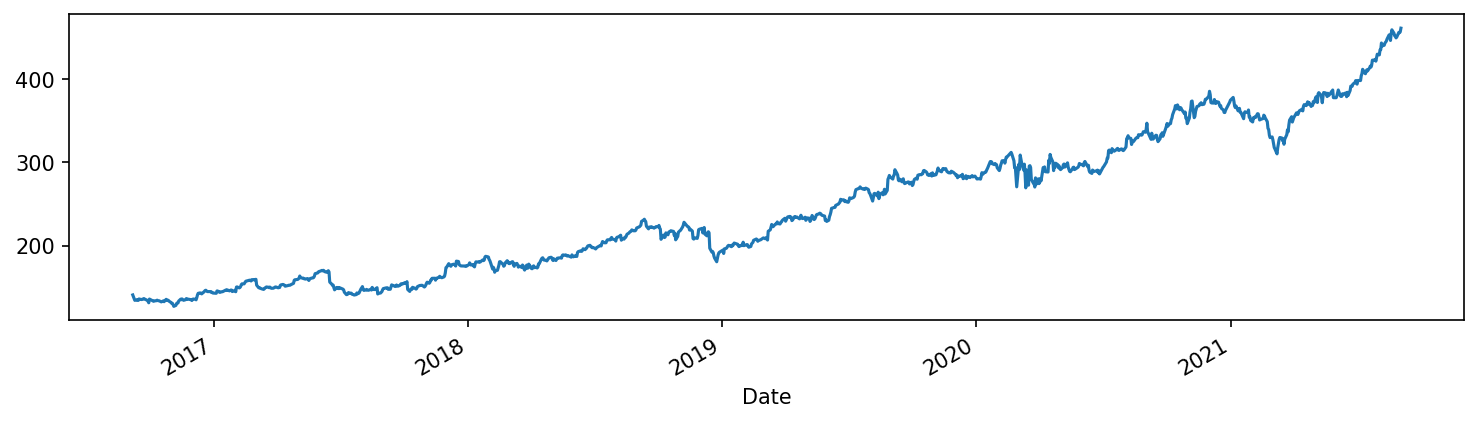

In [265]:
plt.figure(dpi=150)
COST.plot(figsize=(12,3))

Combine into one DataFrame:

In [266]:
retail = pd.concat([sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em],axis=1)
# Make sure to rename columns rather than just all "adjusted close"
retail.columns = ['sp500','sp500_it','invesco_eqqq','vanguard_ftse_dv','ishares_msci_em']

In [267]:
retail

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-19,303.204651,8.700000,152.520004,52.959999,22.393000
2018-10-22,301.908173,8.720000,152.839996,52.680000,22.589001
2018-10-23,300.262421,8.520000,149.460007,51.680000,22.084000
2018-10-24,291.003571,8.470000,149.970001,51.840000,22.063000
2018-10-25,296.382385,8.510000,150.289993,51.939999,22.242001
...,...,...,...,...,...
2022-11-11,468.959991,16.475000,275.549988,74.550003,27.094000
2022-11-14,464.880005,16.592501,278.070007,74.879997,27.163000
2022-11-15,468.959991,16.980000,281.700012,75.320000,27.714001


### Daily Returns

Let's get the daily returns of each company:

In [268]:
retail_returns = retail.pct_change(1).dropna()

In [269]:
retail_returns

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-22,-0.004276,0.002299,0.002098,-0.005287,0.008753
2018-10-23,-0.005451,-0.022936,-0.022115,-0.018983,-0.022356
2018-10-24,-0.030836,-0.005869,0.003412,0.003096,-0.000951
2018-10-25,0.018484,0.004723,0.002134,0.001929,0.008113
2018-10-26,-0.017155,-0.016451,-0.021891,-0.014247,-0.015781
...,...,...,...,...,...
2022-11-11,0.009254,0.019808,0.001854,-0.004274,0.006538
2022-11-14,-0.008700,0.007132,0.009145,0.004426,0.002547
2022-11-15,0.008776,0.023354,0.013054,0.005876,0.020285


<AxesSubplot:xlabel='Date'>

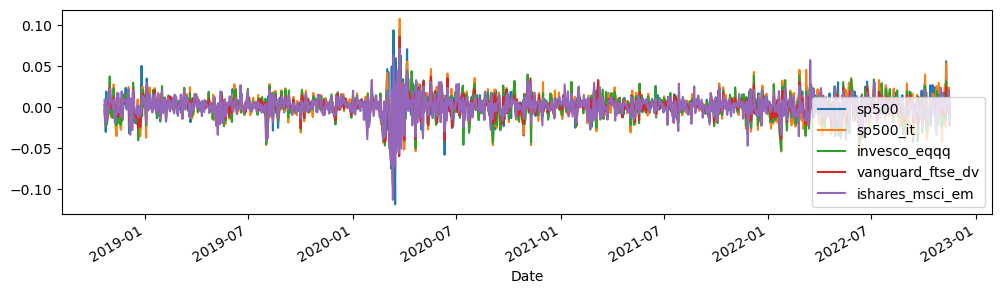

In [270]:
retail_returns.plot(figsize=(12,3))

In [271]:
plt.figure(dpi=150)
retail_returns['WMT'].plot(kind='hist',bins=100,figsize=(12,3))

KeyError: 'WMT'

<Figure size 960x720 with 0 Axes>

#### Cummulative Return

In [272]:
(1 + retail_returns['COST']).cumprod() - 1 

KeyError: 'COST'

In [273]:
cumul_return = (1 + retail_returns['COST']).cumprod() - 1

KeyError: 'COST'

In [274]:
cumul_return_perc = cumul_return*100

NameError: name 'cumul_return' is not defined

In [275]:
plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(12,3))
plt.ylabel("Cumulative Return as %")

NameError: name 'cumul_return_perc' is not defined

<Figure size 960x720 with 0 Axes>

### Weighted Returns

We can calculate the returns based on a weighting by using the dot product.

In [276]:
np.dot([2,3],[10,20])

80

In [277]:
 example_returns = np.array([1,0.5]) # 100% and 50% returns

In [278]:
weights = [1,0]
np.dot(weights,example_returns)

1.0

In [279]:
weights = [0.5,0.5]
np.dot(weights,example_returns)

0.75

Now let's apply this to our dataframe of returns, which we will transpose for dimension matching on the 1-D weight vector dot against the DataFrame of returns:

In [280]:
retail_returns

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-22,-0.004276,0.002299,0.002098,-0.005287,0.008753
2018-10-23,-0.005451,-0.022936,-0.022115,-0.018983,-0.022356
2018-10-24,-0.030836,-0.005869,0.003412,0.003096,-0.000951
2018-10-25,0.018484,0.004723,0.002134,0.001929,0.008113
2018-10-26,-0.017155,-0.016451,-0.021891,-0.014247,-0.015781
...,...,...,...,...,...
2022-11-11,0.009254,0.019808,0.001854,-0.004274,0.006538
2022-11-14,-0.008700,0.007132,0.009145,0.004426,0.002547
2022-11-15,0.008776,0.023354,0.013054,0.005876,0.020285


In [281]:
np.dot([1,0,0,0],retail_returns.transpose())

ValueError: shapes (4,) and (5,1054) not aligned: 4 (dim 0) != 5 (dim 0)

In [180]:
np.dot([0.5,0,0.5,0],retail_returns.transpose())

ValueError: shapes (4,) and (5,1054) not aligned: 4 (dim 0) != 5 (dim 0)

**1/N Weighting**

In [282]:
N = len(retail_returns.columns)
equal_weights = N * [1/N] # Shows 1/4, 4 times. Its not multiplication, but repetition! 4*["A"]

In [283]:
equal_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [284]:
retail_returns.transpose()

Date,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,...,2022-11-04,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-14,2022-11-15,2022-11-16,2022-11-17
sp500,-0.004276,-0.005451,-0.030836,0.018484,-0.017155,-0.006597,0.015760,0.010854,0.010583,-0.006216,...,0.013808,0.009622,0.005593,-0.020557,0.055470,0.009254,-0.008700,0.008776,-0.008018,-0.002881
sp500_it,0.002299,-0.022936,-0.005869,0.004723,-0.016451,-0.002389,-0.008383,0.030193,0.005862,-0.012820,...,-0.004305,0.018291,0.027433,-0.024793,0.053129,0.019808,0.007132,0.023354,-0.022085,-0.009033
invesco_eqqq,0.002098,-0.022115,0.003412,0.002134,-0.021891,-0.004762,-0.006562,0.036948,0.000730,-0.006365,...,-0.018059,0.005502,0.017054,-0.017063,0.031194,0.001854,0.009145,0.013054,-0.019950,-0.003187
vanguard_ftse_dv,-0.005287,-0.018983,0.003096,0.001929,-0.014247,0.004687,-0.002722,0.023392,-0.000381,-0.001715,...,-0.008978,0.004667,0.009837,-0.010824,0.024073,-0.004274,0.004426,0.005876,-0.014073,-0.004040
ishares_msci_em,0.008753,-0.022356,-0.000951,0.008113,-0.015781,-0.000548,-0.002879,0.021727,0.022521,0.009740,...,0.017058,-0.001267,0.001418,-0.007118,0.010284,0.006538,0.002547,0.020285,-0.023490,0.004471


In [285]:
equal_returns = np.dot(equal_weights,retail_returns.transpose())


In [286]:
(0.25*-0.015311)+(0.25*-0.012877)+(0.25*0.002853)+(0.25*-0.003472)

-0.007201749999999999

In [287]:
equal_returns

array([ 0.00071736, -0.01836802, -0.00622942, ...,  0.01426913,
       -0.01752322, -0.00293403])

In [288]:
cum_equal_returns =   (1 + equal_returns).cumprod() - 1

In [289]:
cum_equal_returns

array([ 0.00071736, -0.01766383, -0.02378322, ...,  0.61858527,
        0.59022244,  0.58555668])

In [290]:
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = retail_returns.index

<AxesSubplot:xlabel='Date'>

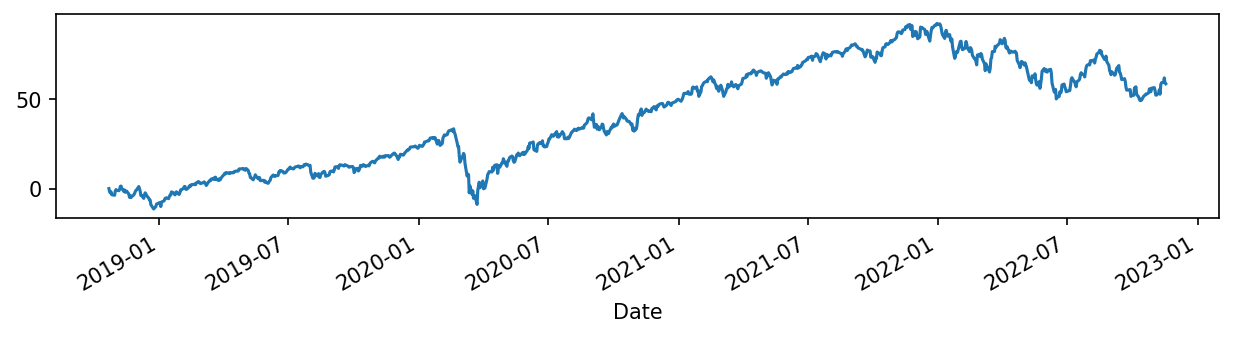

In [291]:
plt.figure(dpi=150)
cum_equal_returns_perc.plot(figsize=(10,2))

**Which is better, equally weighted, or all in on COSTCO?**

**Cummulative Return:**

In [292]:
plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(10,2),label='COSTCO')
cum_equal_returns_perc.plot(figsize=(10,2),label='EQUAL WEIGHTS')
plt.legend()

NameError: name 'cumul_return_perc' is not defined

<Figure size 960x720 with 0 Axes>

# Monte Carlo Simulation for Optimization Search

Let's try randomly sampling different weights of portfolios and then map out and plot their returns, risk, and Sharpe Ratios. Then we will be able to visually pick our desired weighting, keep in mind, the down side here is that we will need o simulate many, many variations!

#### Why use Log Returns?

As we've already seen, the benefit of using returns, versus prices, is **normalization**: allowing us to measure all variables in a comparable metric, thus enabling evaluation of analytic relationships amongst two or more variables despite originating from price series of unequal values. 

When considering the best weighting, will we only look at mean and variance, which means we are assuming a normal distribution of returns. But how can we get these, log-normality: if we assume that prices are distributed log normally (which, in practice, may or may not be true for any given price series), then **log(1 + r_i)** is normally distributed!

In [293]:
retail/retail.shift(1)

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-19,NaN,NaN,NaN,NaN,NaN
2018-10-22,0.995724,1.002299,1.002098,0.994713,1.008753
2018-10-23,0.994549,0.977064,0.977885,0.981017,0.977644
2018-10-24,0.969164,0.994131,1.003412,1.003096,0.999049
2018-10-25,1.018484,1.004723,1.002134,1.001929,1.008113
...,...,...,...,...,...
2022-11-11,1.009254,1.019808,1.001854,0.995726,1.006538
2022-11-14,0.991300,1.007132,1.009145,1.004426,1.002547
2022-11-15,1.008776,1.023354,1.013054,1.005876,1.020285


In [294]:
# np.log(1+retail.pct_change(1)) # <-- this is the same thing
# Log Returns as Percent of next day
log_rets = np.log(retail/retail.shift(1))

In [295]:
log_rets

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-19,NaN,NaN,NaN,NaN,NaN
2018-10-22,-0.004285,0.002296,0.002096,-0.005301,0.008715
2018-10-23,-0.005466,-0.023203,-0.022363,-0.019165,-0.022610
2018-10-24,-0.031321,-0.005886,0.003406,0.003091,-0.000951
2018-10-25,0.018315,0.004711,0.002131,0.001927,0.008080
...,...,...,...,...,...
2022-11-11,0.009211,0.019614,0.001852,-0.004283,0.006517
2022-11-14,-0.008738,0.007107,0.009104,0.004417,0.002543
2022-11-15,0.008738,0.023085,0.012970,0.005859,0.020082


In [296]:
# Notice how close this is to our original returns!
retail.pct_change(1)

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
Date,,,,,
2018-10-19,NaN,NaN,NaN,NaN,NaN
2018-10-22,-0.004276,0.002299,0.002098,-0.005287,0.008753
2018-10-23,-0.005451,-0.022936,-0.022115,-0.018983,-0.022356
2018-10-24,-0.030836,-0.005869,0.003412,0.003096,-0.000951
2018-10-25,0.018484,0.004723,0.002134,0.001929,0.008113
...,...,...,...,...,...
2022-11-11,0.009254,0.019808,0.001854,-0.004274,0.006538
2022-11-14,-0.008700,0.007132,0.009145,0.004426,0.002547
2022-11-15,0.008776,0.023354,0.013054,0.005876,0.020285


#### Generating Random Weights

Let's see how we can use numpy to generate random weightings to test:

In [297]:
N = len(retail.columns)

weights = np.random.random(N)

In [298]:
weights

array([0.41274505, 0.40673458, 0.18275742, 0.97391   , 0.60950705])

In [299]:
# They need to sum up to 1!
weights = weights/ np.sum(weights)

In [300]:
weights

array([0.15962887, 0.15730433, 0.07068131, 0.37665904, 0.23572645])

In [301]:
np.sum(weights)

1.0

In [302]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

Now we just need two functions, one that gives the returns for a specific weighting and another that reports back the volatility for a specific weighting.

#### Portfolio Returns Function

In [303]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 #Annualized Returns

#### Portfolio Volatility (Variance) Function

Note how we are now calculating the variance for an entire portfolio, not just a single stock's standard deviation or variance. We can calculate this with the Expected Portfolio Variance Equation using covariance: https://www.investopedia.com/terms/p/portfolio-variance.asp

In [304]:
log_rets.cov()

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
sp500,0.000215,0.000142,0.000111,0.000109,0.000112
sp500_it,0.000142,0.000255,0.000209,0.000161,0.000147
invesco_eqqq,0.000111,0.000209,0.000201,0.000143,0.000132
vanguard_ftse_dv,0.000109,0.000161,0.000143,0.000133,0.000124
ishares_msci_em,0.000112,0.000147,0.000132,0.000124,0.000178


In [305]:
log_rets_cov = log_rets.cov()

In [306]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [307]:
calculate_volatility(weights,log_rets_cov)

0.1887589121984531

Now we just create many, many random weightings, and we can then plot them on expected return vs. expected volatility (coloring them by Sharpe Ratio):

In [308]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

In [309]:
log_rets_cov 

,sp500,sp500_it,invesco_eqqq,vanguard_ftse_dv,ishares_msci_em
sp500,0.000215,0.000142,0.000111,0.000109,0.000112
sp500_it,0.000142,0.000255,0.000209,0.000161,0.000147
invesco_eqqq,0.000111,0.000209,0.000201,0.000143,0.000132
vanguard_ftse_dv,0.000109,0.000161,0.000143,0.000133,0.000124
ishares_msci_em,0.000112,0.000147,0.000132,0.000124,0.000178


In [310]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = gen_weights(N=5)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [311]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

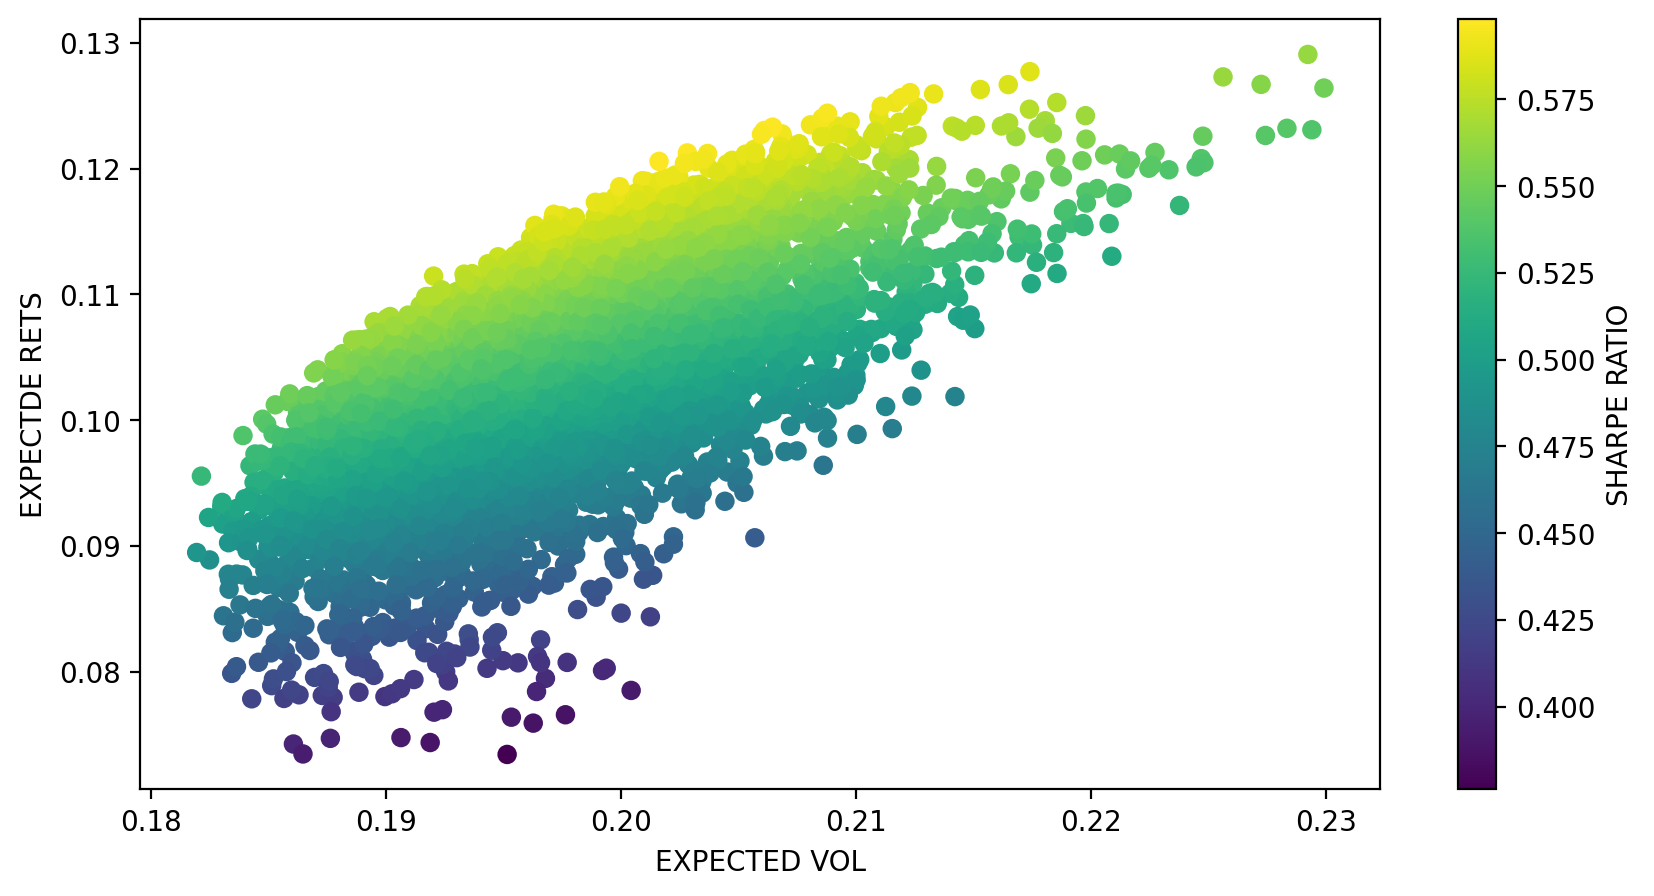

In [312]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [313]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.49857741, 0.1076662 , 0.34782163, 0.04430998, 0.00162478])

# Optimal Weighting through Minimization Search

Using Sharpe Ratio as our guide, let's find the weights that optimize for the Sharpe Ratio using Scipy's minimize function tool!

In [314]:
from scipy.optimize import minimize

In [315]:
# help(minimize)
calculate_returns(equal_weights,log_rets)

0.10297800283793947

In [316]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [317]:
bounds = tuple((0,1) for n in range(N))

In [318]:
# Bound for each weighting (we only go long)
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [319]:
# Starting Guess
equal_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [320]:
# Need to constrain all weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [321]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

     fun: -0.6017400696563355
     jac: array([-1.57654285e-05, -6.40749931e-07,  2.39610672e-05,  6.59911186e-02,
        1.75323680e-01])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([4.87720253e-01, 1.86382049e-01, 3.25897698e-01, 0.00000000e+00,
       1.73472348e-18])

In [325]:
np.sum(np.array([4.87720253e-01, 1.86382049e-01, 3.25897698e-01, 0.00000000e+00,
       1.73472348e-18]))

1.0

In [326]:
retail.columns

Index(['sp500', 'sp500_it', 'invesco_eqqq', 'vanguard_ftse_dv',
       'ishares_msci_em'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

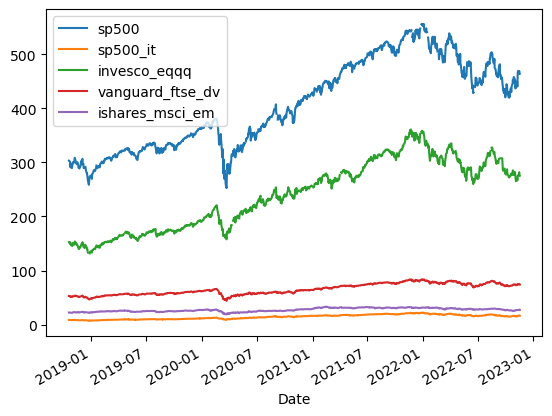

In [327]:
retail.plot()

## Efficient Frontier

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier: https://en.wikipedia.org/wiki/Efficient_frontier

In [328]:
expected_returns_range = np.linspace(0.08,0.20,100)

In [329]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [330]:
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

Now loop for different expected returns:

In [331]:
frontier_volatility = []

for possible_return in expected_returns_range:
    # function for return
    
    
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])

### Plot Frontier

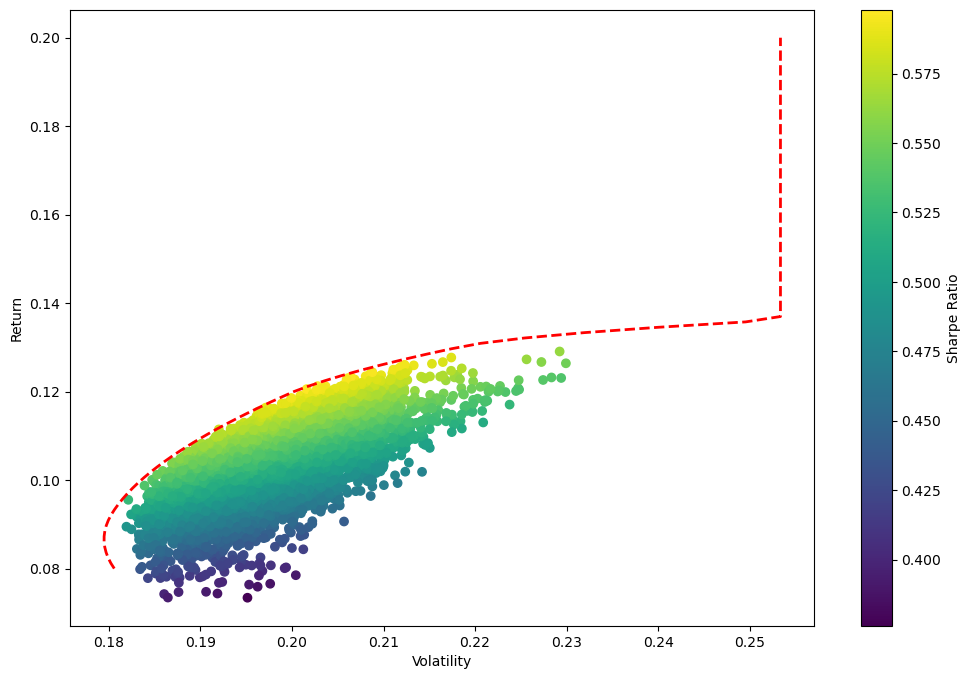

In [332]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)